<a href="https://colab.research.google.com/github/fiksdevploper/machine-learning_model-deteksi-kangker/blob/main/Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Liblary

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set()

# Import Data

In [ ]:
from sklearn.datasets import load_breast_cancer
kangker = load_breast_cancer()

# menampilkan tabel
df_kangker = pd.DataFrame(data=kangker.data, columns=kangker.feature_names)
df_kangker ['status'] = kangker.target
df_kangker

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,status
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


# Visualisasi Data


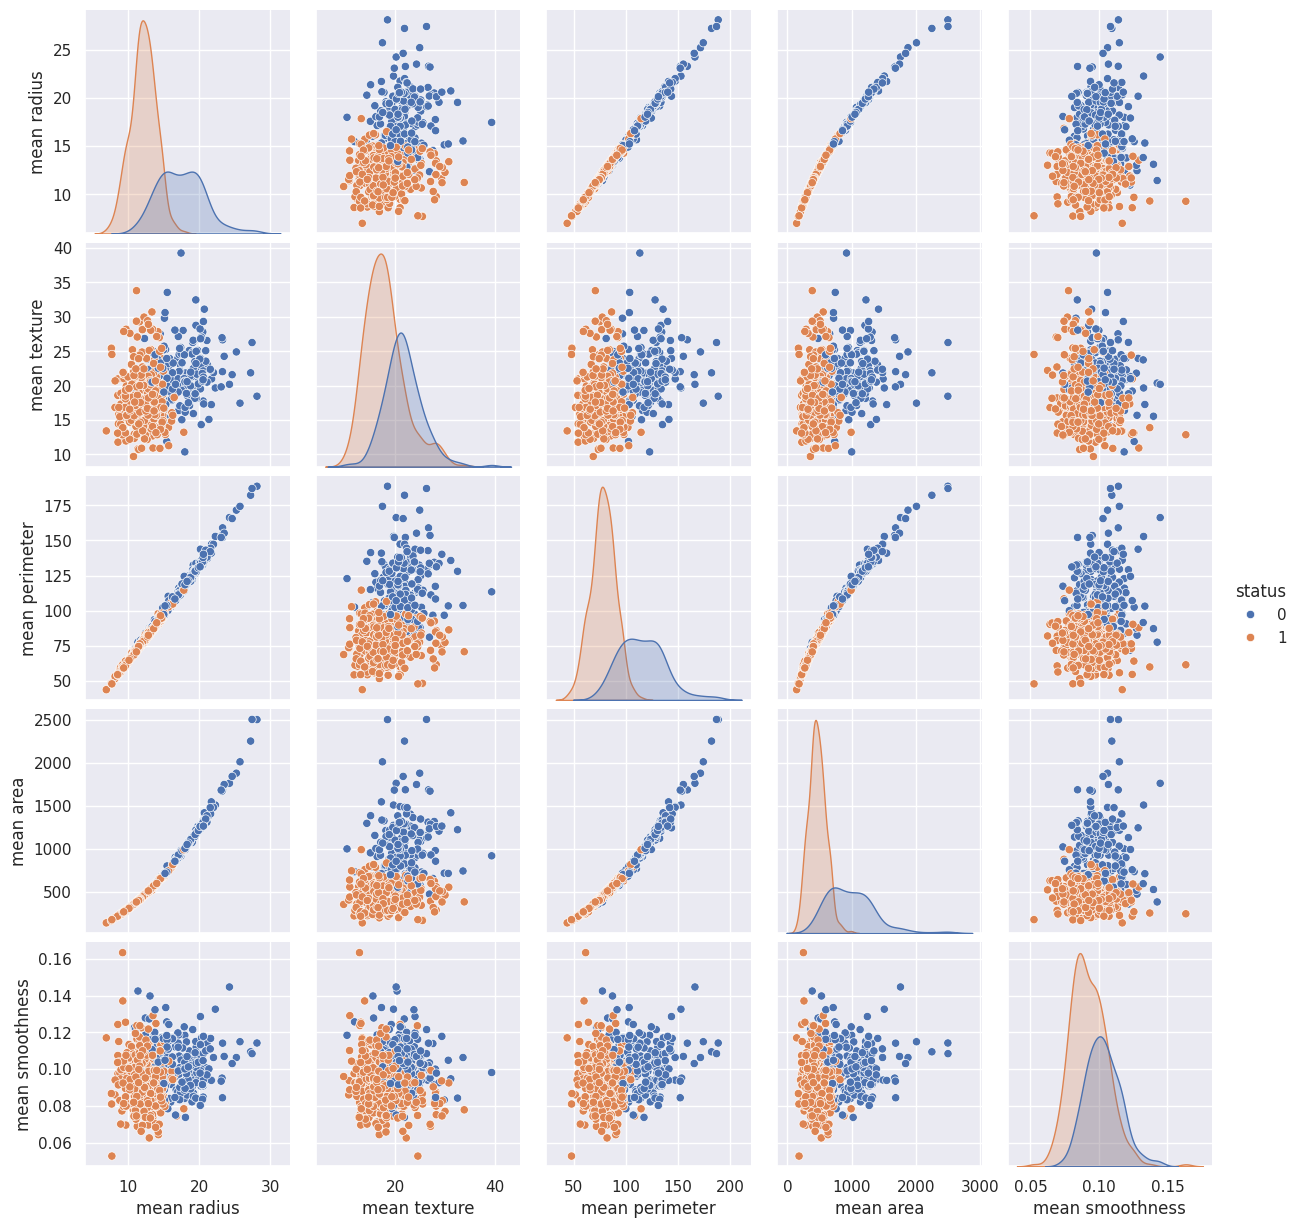

In [ ]:
sns.pairplot(df_kangker, vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'], hue='status')

<Axes: >

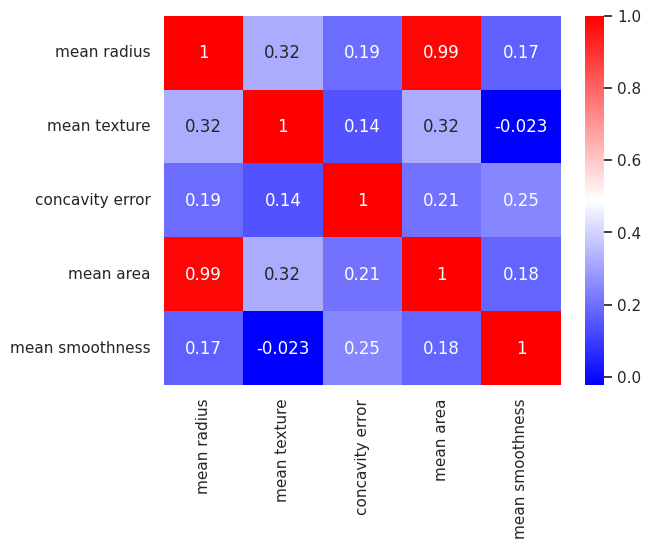

In [ ]:
sns.heatmap(df_kangker[['mean radius', 'mean texture', 'concavity error', 'mean area', 'mean smoothness']].corr(), annot=True, cmap='bwr')

# Pelatihan Data

In [ ]:
# tahap pra-pemerosesan data
X = df_kangker.drop(['status'],axis=1)
y = df_kangker['status']

# membagi dataset menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #membagi data latih sebanyak 80% dan data uji menjadi 20%

In [ ]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Pelatihan data Menggunakan algoritma SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

classifier = SVC(kernel='rbf')
classifier.fit(X_train, y_train)

SVC()

---Hasil Klasifikasi Algoritma SVM---
[[45  2]
 [ 0 67]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        47
           1       0.97      1.00      0.99        67

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Akurasi: 98.25%


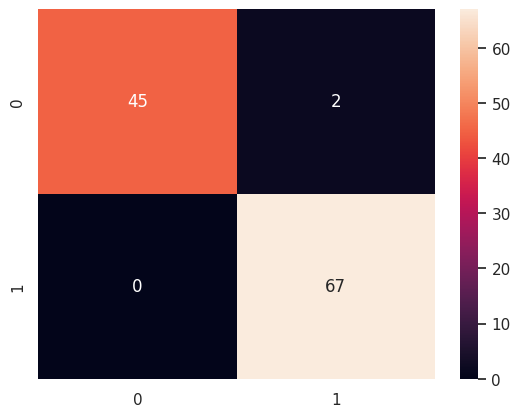

In [110]:
# evaluasi performa model
y_pred = classifier.predict(X_test)

# visualisasi
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

# hasil evaluasi
print("---Hasil Klasifikasi Algoritma SVM---")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# akurasi algoritma
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi: {:.2f}%".format(accuracy * 100))

# Menyimpan model dan data machine learning


In [111]:
# simpan model dengan joblib
joblib.dump((classifier, sc_X), "kangker_model_machine-learning.joblib")

['kangker_model_machine-learning.joblib']

In [ ]:
from sklearn.datasets import load_breast_cancer
# simpan dataset
kangker_dataset = 'cancer_dataset.csv'
df_kangker.to_csv(kangker_dataset, index=False)
print(f"\nDataset berhasil disimpan ke '{kangker_dataset}'")


Dataset berhasil disimpan ke 'cancer_dataset.csv'
